In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py

from plotly.offline import init_notebook_mode, iplot, plot
from plotly import subplots
init_notebook_mode(connected=True)
import plotly.graph_objs as go
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [3]:
cols = confirmed_df.keys()

In [4]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]

In [5]:
dates = confirmed.keys()
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recovered = []
total_active = []

mas_cases = []
mas_deaths = []
mas_recoveries = []
mas_active = []


for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum - deaths_sum - recovered_sum)
    
    mortality_rate.append(deaths_sum / confirmed_sum)
    recovery_rate.append(recovered_sum / confirmed_sum)
    
    mas_cases.append(confirmed_df[confirmed_df['Country/Region']=='Malaysia'][i].sum())
    mas_deaths.append(deaths_df[deaths_df['Country/Region']=='Malaysia'][i].sum())
    mas_recoveries.append(recoveries_df[recoveries_df['Country/Region']=='Malaysia'][i].sum())
    mas_active.append((confirmed_df[confirmed_df['Country/Region']=='Malaysia'][i].sum()) 
                     - (deaths_df[deaths_df['Country/Region']=='Malaysia'][i].sum()) 
                     - (recoveries_df[recoveries_df['Country/Region']=='Malaysia'][i].sum()))

In [6]:
def daily_increase(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i] - data[i-1])
    return d

world_daily_increase = daily_increase(world_cases)
mas_daily_increase = daily_increase(mas_cases)


world_daily_death = daily_increase(total_deaths)
mas_daily_death = daily_increase(mas_deaths)

world_daily_recovery = daily_increase(total_recovered)
mas_daily_recovery = daily_increase(mas_recoveries)

In [7]:
dates = pd.to_datetime(dates)
latest_day = 60

def country_plot(x, y1, y2, y3, y4, y5, y6, y7, country):
    plt.figure(figsize=(12, 6))
    plt.plot(x[(len(dates) - latest_day):], y1[(len(dates) - latest_day):])
    plt.title('{} Confirmed Cases'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()
    
    plt.figure(figsize=(12,6))
    plt.fill_between(x[(len(dates) - latest_day):], y1[(len(dates) - latest_day):], color="yellow", alpha=0.3)
    plt.plot(x[(len(dates) - latest_day):], y1[(len(dates) - latest_day):], label='Confirmed', color='yellow')
    plt.fill_between(x[(len(dates) - latest_day):], y7[(len(dates) - latest_day):], color="green", alpha=0.3)
    plt.plot(x[(len(dates) - latest_day):], y7[(len(dates) - latest_day):], label='Recoveries', color='green')
    plt.fill_between(x[(len(dates) - latest_day):], y6[(len(dates) - latest_day):], color="red", alpha=0.3)
    plt.plot(x[(len(dates) - latest_day):], y6[(len(dates) - latest_day):], label='Deaths', color='red')
    plt.title('{} Overall Cases'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.legend(prop={'size': 10})
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(x[(len(dates) - latest_day):], y2[(len(dates) - latest_day):])
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

    plt.figure(figsize=(12, 6))
    plt.bar(x[(len(dates) - latest_day):], y3[(len(dates) - latest_day):])
    plt.title('{} Daily Increases in Deaths'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.bar(x[(len(dates) - latest_day):], y4[(len(dates) - latest_day):])
    plt.title('{} Daily Increases in Recoveries'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()
    
    plt.figure(figsize=(12, 6))
    plt.bar(x[(len(dates) - latest_day):], y5[(len(dates) - latest_day):])
    plt.title('{} Active Cases'.format(country), size=20)
    plt.xlabel('Recent {} days'.format(latest_day), size=15)
    plt.ylabel('# of Cases', size=15)
    plt.xticks(size=12)
    plt.yticks(size=12)
    plt.show()

In [8]:
#plt.axvline(x[(len(dates) - latest_day):][0], color='black', linestyle='--', lw=1.5)

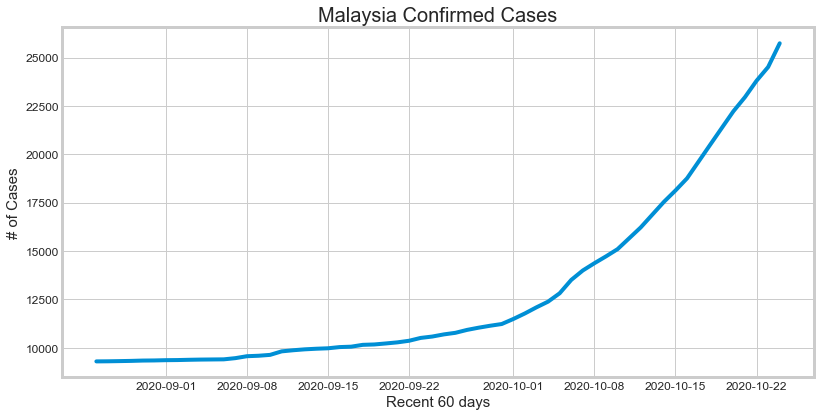

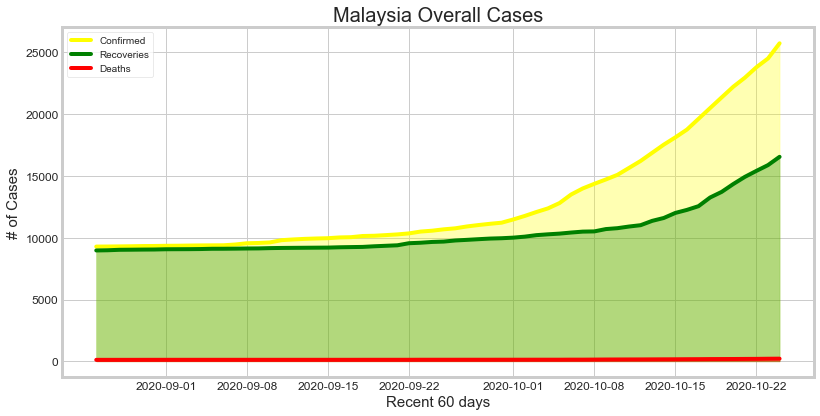

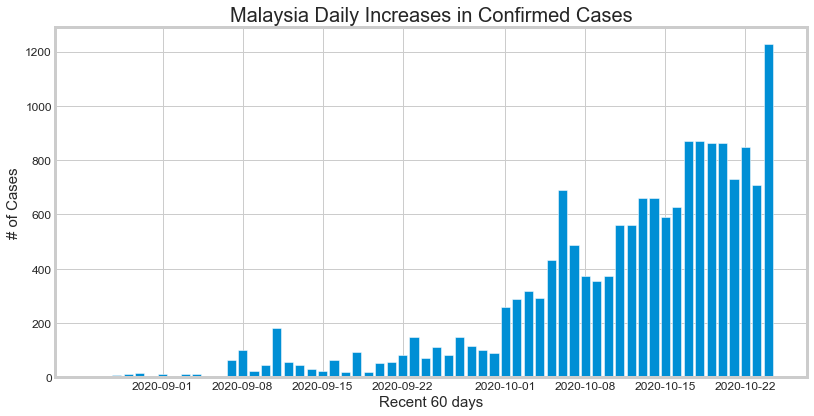

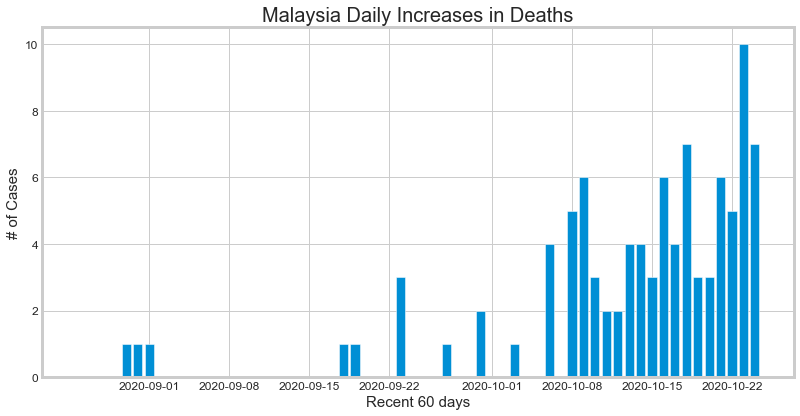

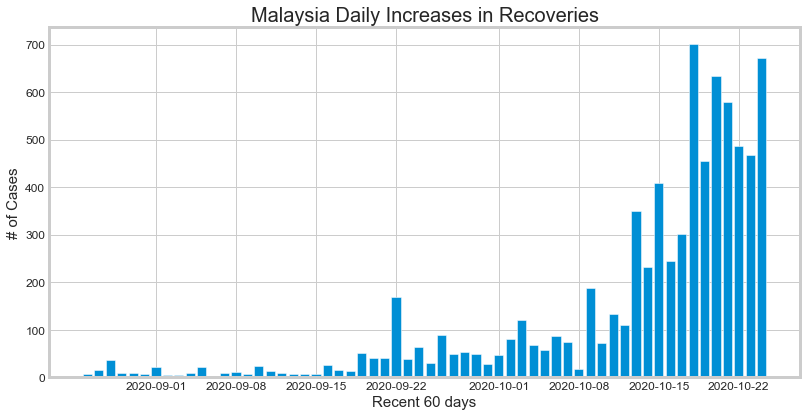

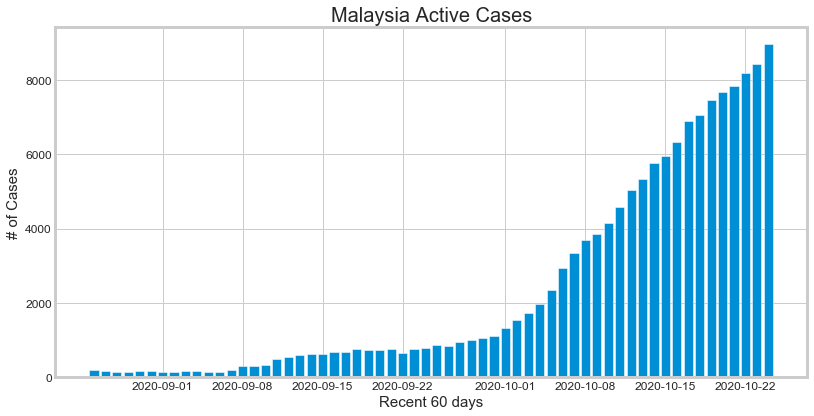

In [9]:
country_plot(dates, mas_cases, mas_daily_increase, mas_daily_death, mas_daily_recovery, mas_active, mas_deaths, mas_recoveries, 'Malaysia')

In [14]:
latest_day = 60

trace = go.Bar(x = dates[(len(dates) - latest_day):], 
               y = mas_cases[(len(dates) - latest_day):], 
               marker = dict(color ='rgb(171, 50, 96)', 
                             line = dict(color = 'rgba(171, 50, 96, 1.0)', 
                                         width = 1)), 
               orientation = 'v')

data = [trace]
layout = go.Layout(title='Total Cases', 
                   barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [11]:
datee = pd.DataFrame(dates)
datee.columns = ['Date']

mmas_confirmed = pd.DataFrame(mas_cases)
mmas_confirmed.columns = ['confirmed']

mmas_deaths = pd.DataFrame(mas_deaths)
mmas_deaths.columns = ['deaths']

mmas_recoveries = pd.DataFrame(mas_recoveries)
mmas_recoveries.columns = ['recoveries']

mmas_active = pd.DataFrame(mas_active)
mmas_active.columns = ['active_cases']

mmas_daily_increase = pd.DataFrame(mas_daily_increase)
mmas_daily_increase.columns = ['daily_increase']

mmas_daily_death = pd.DataFrame(mas_daily_death)
mmas_daily_death.columns = ['daily_death']

mmas_daily_recovery = pd.DataFrame(mas_daily_recovery)
mmas_daily_recovery.columns = ['daily_recovery']

pair_plot = pd.concat([datee, 
                       mmas_confirmed, 
                       mmas_deaths, 
                       mmas_recoveries, 
                       mmas_active,
                       mmas_daily_increase, 
                       mmas_daily_death, 
                       mmas_daily_recovery], 
                     axis=1)

<Figure size 1440x1440 with 0 Axes>

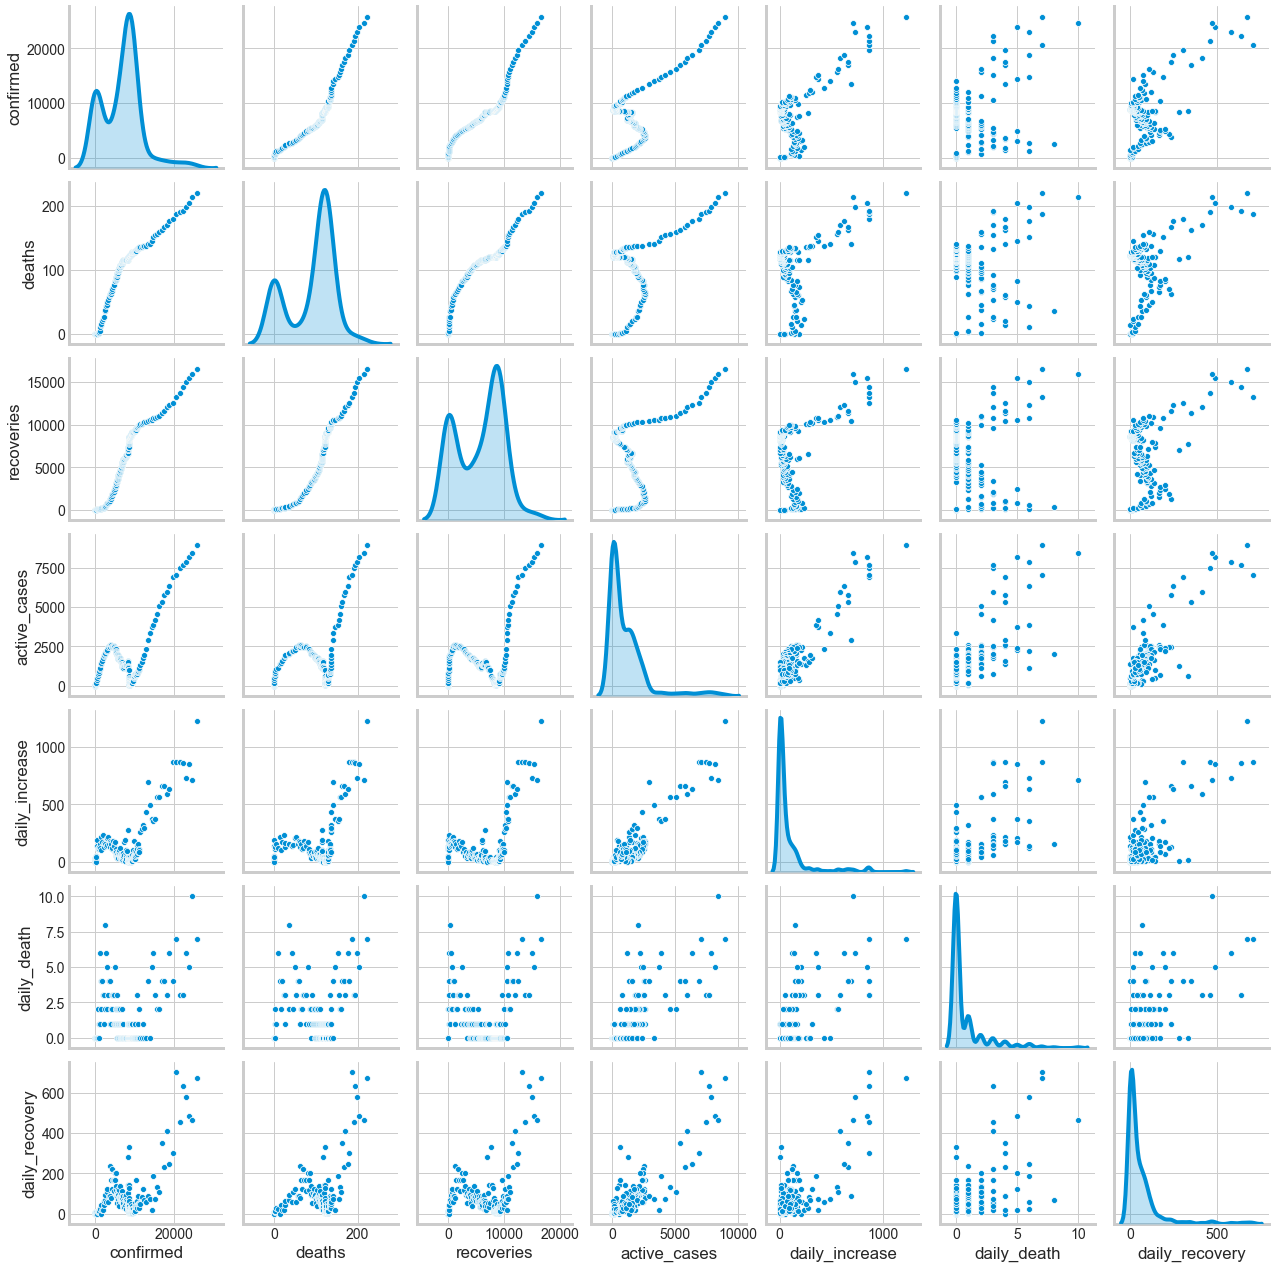

In [12]:
plt.figure(figsize=(20,20))
sns.pairplot(pair_plot, diag_kind='kde')

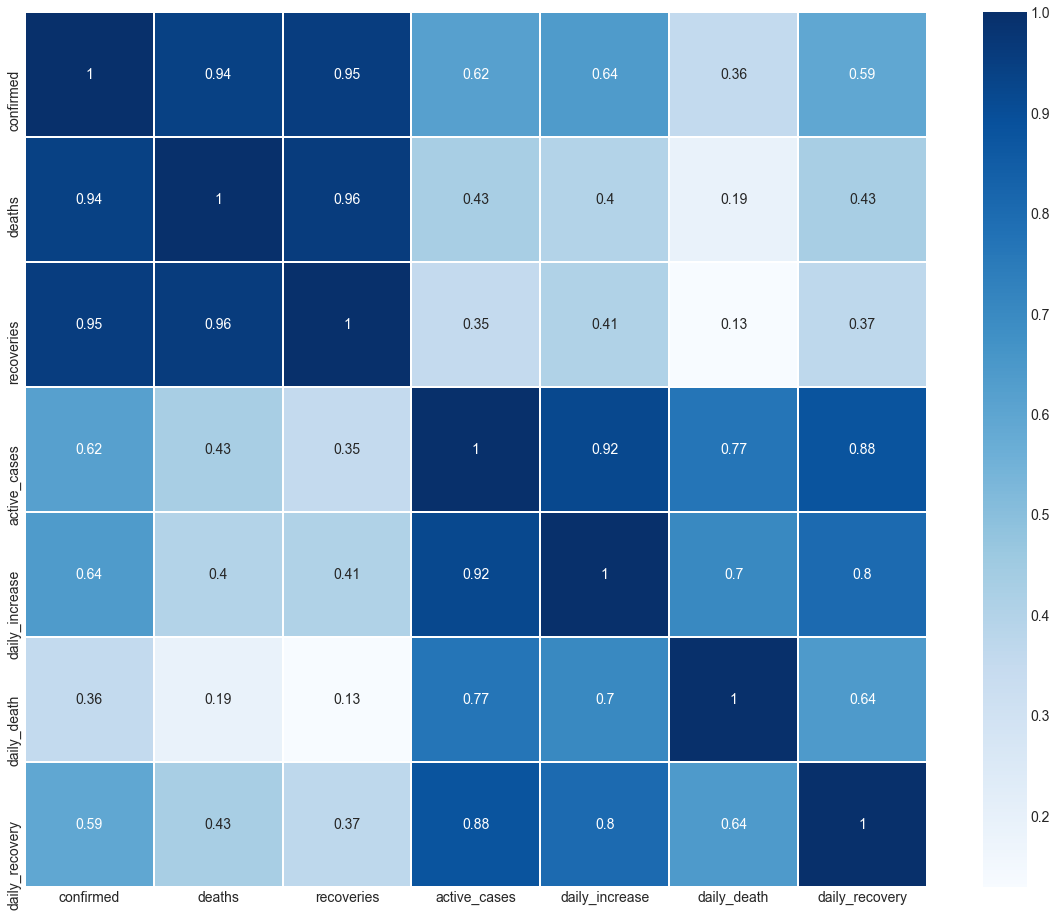

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(pair_plot.corr(), annot=True, cmap='Blues', linewidth=1)